In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt



In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# scaling the pixel 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #reshaping to match model input shape
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
noise_factor = 0.5
# Adding random noise to the training and testing data
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Clip the pixel values to ensure they are within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


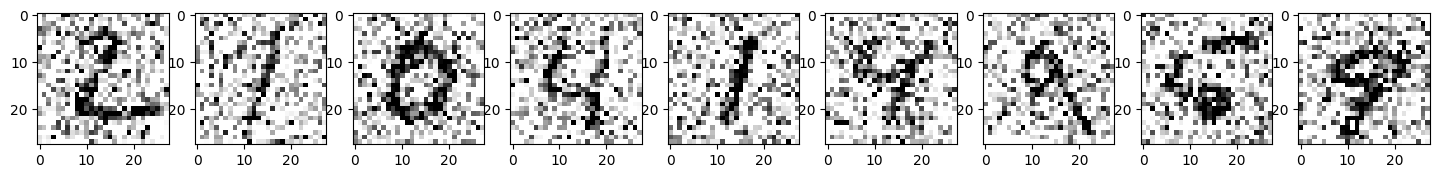

In [6]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [8]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

model.evaluate(x_test_noisy, x_test)


235/235 [==============================] - 68s 283ms/step - loss: 0.0536 - val_loss: 0.0402
Epoch 2/10
235/235 [==============================] - 66s 282ms/step - loss: 0.0362 - val_loss: 0.0327
Epoch 3/10
235/235 [==============================] - 66s 282ms/step - loss: 0.0313 - val_loss: 0.0298
Epoch 4/10
235/235 [==============================] - 66s 283ms/step - loss: 0.0290 - val_loss: 0.0278
Epoch 5/10
235/235 [==============================] - 66s 280ms/step - loss: 0.0274 - val_loss: 0.0268
Epoch 6/10
235/235 [==============================] - 66s 282ms/step - loss: 0.0262 - val_loss: 0.0255
Epoch 7/10
235/235 [==============================] - 67s 284ms/step - loss: 0.0253 - val_loss: 0.0247
Epoch 8/10
235/235 [==============================] - 67s 283ms/step - loss: 0.0245 - val_loss: 0.0240
Epoch 9/10
235/235 [==============================] - 66s 280ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 10/10
313/313 [==============================] - 4s 11ms/step - loss: 0.0229


0.022897323593497276

In [9]:
model.save('/kaggle/working/denoising_autoencoder.model')

313/313 [==============================] - 4s 11ms/step


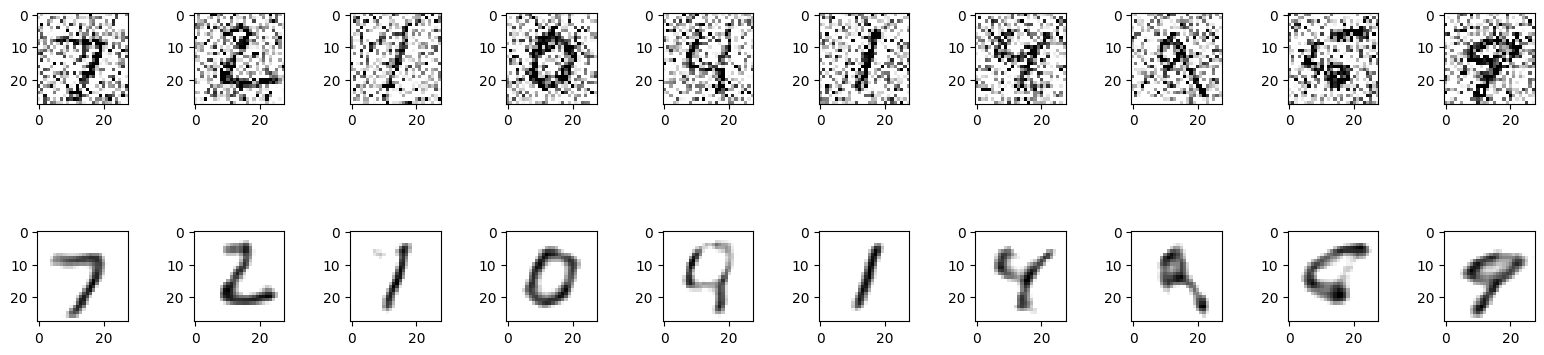

In [10]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()
